# Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Read Data

In [5]:
covid = pd.read_csv("covid_19_data.csv")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


# Data Cleansing

In [6]:
print("Size/shape of the dataset",covid.shape)
print("Checking for null values: \n", covid.isnull().sum())
print("Checking Data-type: ", covid.dtypes)

Size/shape of the dataset (13209, 8)
Checking for null values: 
 SNo                   0
ObservationDate       0
Province/State     6382
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
Checking Data-type:  SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


# Data Pre-processing

In [0]:
# Dropping the column SNO
covid.drop(["SNo"],1,inplace = True)

In [0]:
covid["ObservationDate"] = pd.to_datetime(covid["ObservationDate"])

In [0]:
# Grouping different types of cases as per date
datewise = covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [10]:
print("Basic Information")
print("Total number of Confirmed cases around the world", datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world", datewise["Recovered"].iloc[-1])
print("Total number of Deaths cases around the world", datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the world", datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1])
print("Total number of Closed cases around the world",datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1])

Basic Information
Total number of Confirmed cases around the world 1511104.0
Total number of Recovered cases around the world 328661.0
Total number of Deaths cases around the world 88338.0
Total number of Active cases around the world 1094105.0
Total number of Closed cases around the world 240323.0


#Graph plotting 



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 <a list of 78 Text major ticklabel objects>)

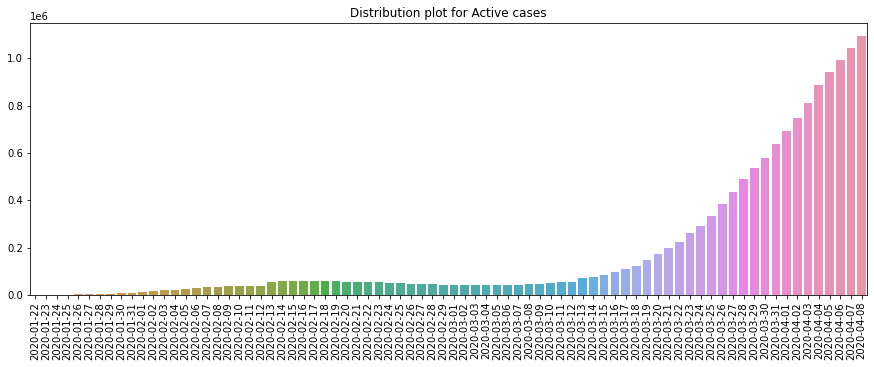

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date, y= datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distribution plot for Active cases")
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 <a list of 78 Text major ticklabel objects>)

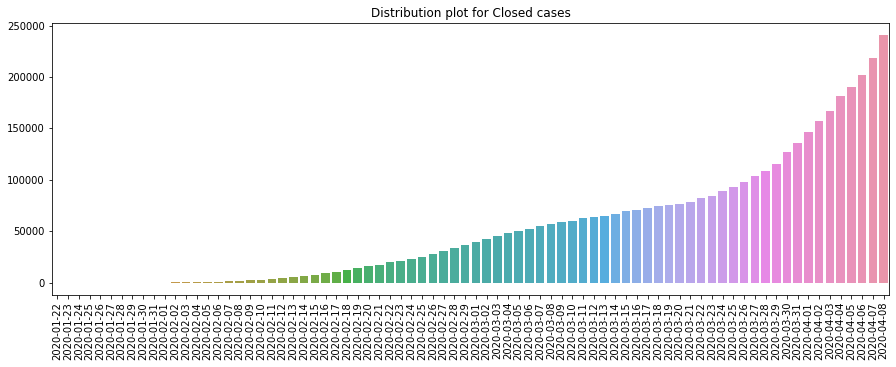

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date, y= datewise["Recovered"]-datewise["Deaths"])
plt.title("Distribution plot for Closed cases")
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Weekly Progress of different types of cases')

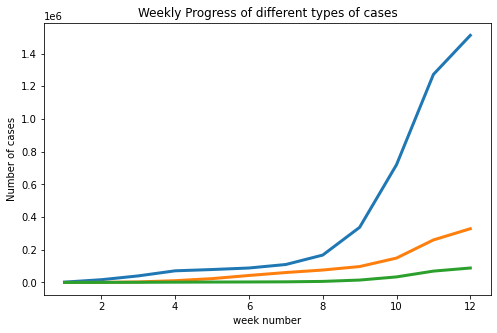

In [13]:
datewise["WeekofYear"] = datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1

for i in list(datewise["WeekofYear"].unique()):
  weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
  weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
  weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
  week_num.append(w)
  w = w+1
plt.figure(figsize = (8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.xlabel("week number")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

Average increase in no of Confirmed cases everday 19366.0
Average increase in no of Recovered cases everday 4213.0
Average increase in no of Deaths cases everday 1132.0


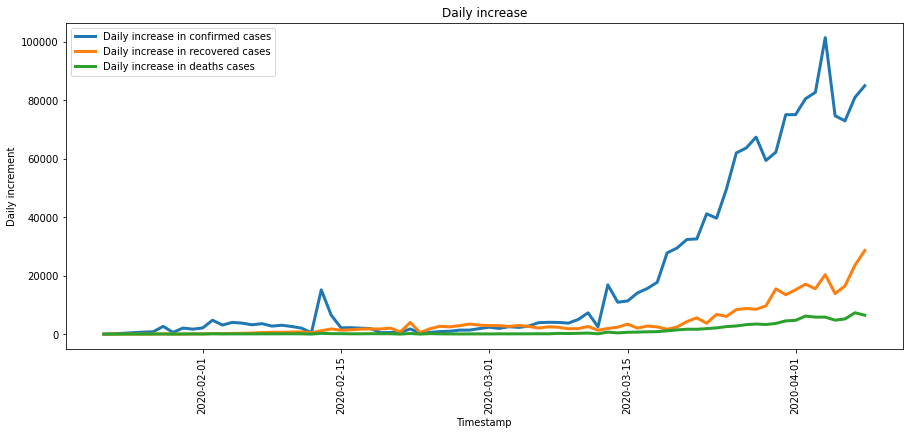

In [14]:
plt.figure(figsize = (15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label = "Daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label = "Daily increase in recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label = "Daily increase in deaths cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increment")
plt.title("Daily increase")
plt.xticks(rotation = 90)
plt.legend()

print("Average increase in no of Confirmed cases everday",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in no of Recovered cases everday",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in no of Deaths cases everday",np.round(datewise["Deaths"].diff().fillna(0).mean()))

In [0]:
# Calculate the country wise mortality rate
countrywise = covid[covid["ObservationDate"] == covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending = False)
countrywise["Mortality"] = (countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"] = (countrywise["Recovered"]/countrywise["Confirmed"])*100

Text(0.5, 1.0, 'Top15 countries as per deaths cases')

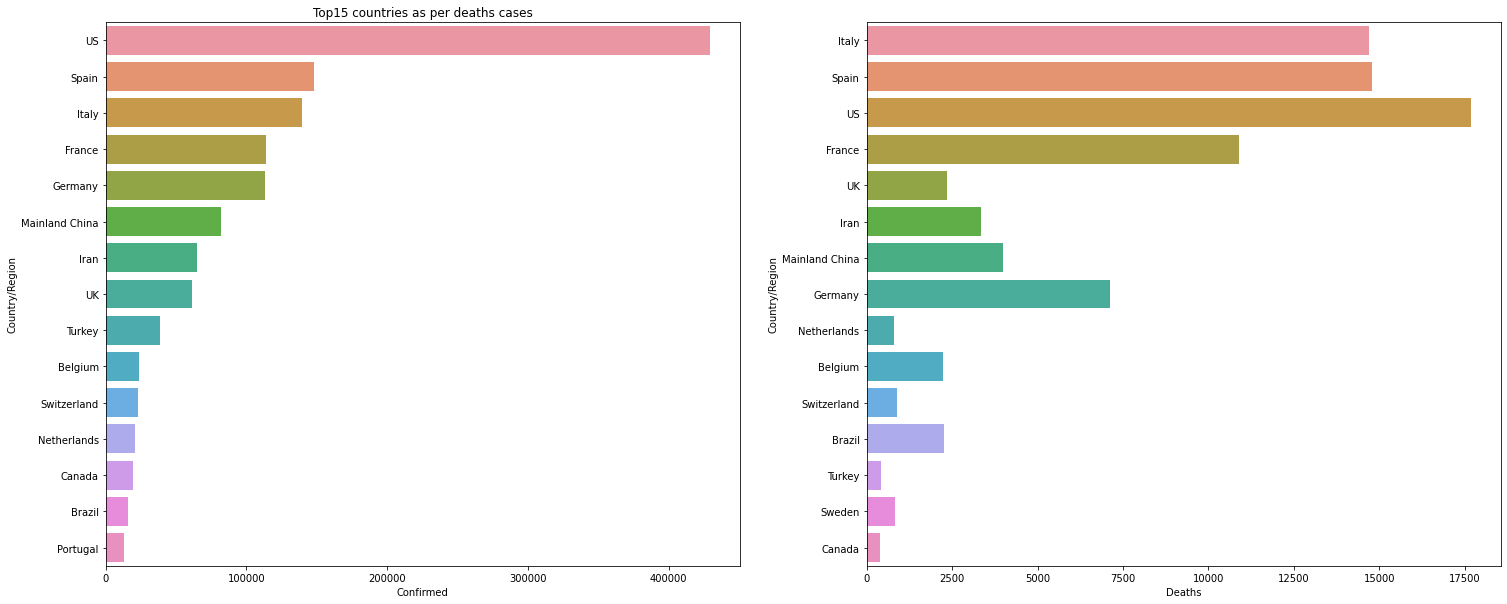

In [16]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (25,10))
top_15confirmed = countrywise.sort_values(["Confirmed"],ascending = False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending = False).head(15)
sns.barplot(x = top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top15 countries as per confirmed cases")
sns.barplot(x = top_15confirmed["Deaths"],y=top_15deaths.index,ax=ax2)
ax1.set_title("Top15 countries as per deaths cases")

In [17]:
# Data Analysis for India
india_data = covid[covid["Country/Region"]=="India"]
datewise_india = india_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
print(datewise_india.iloc[-1])
print("Toatal Active cases:", datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed cases:", datewise_india["Recovered"].iloc[-1]+ datewise_india["Deaths"].iloc[-1])

Confirmed    5916.0
Recovered     506.0
Deaths        178.0
Name: 2020-04-08 00:00:00, dtype: float64
Toatal Active cases: 5232.0
Total Closed cases: 684.0


Text(0.5, 1.0, 'Weekly Progress of different types of cases')

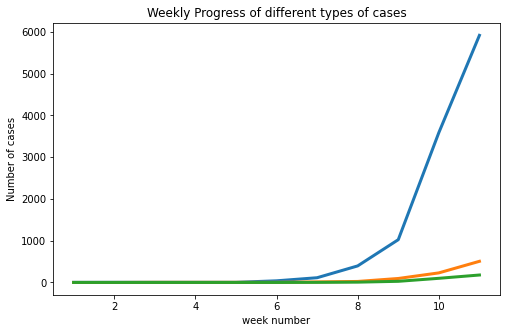

In [18]:
datewise_india["WeekofYear"] = datewise_india.index.weekofyear
week_num_india = []
india_weekwise_confirmed = []
india_weekwise_recovered = []
india_weekwise_deaths = []
w = 1

for i in list(datewise_india["WeekofYear"].unique()):
  india_weekwise_confirmed.append(datewise_india[datewise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
  india_weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
  india_weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
  week_num_india.append(w)
  w = w+1
plt.figure(figsize = (8,5))
plt.plot( week_num_india, india_weekwise_confirmed, linewidth=3)
plt.plot( week_num_india, india_weekwise_recovered, linewidth=3)
plt.plot( week_num_india, india_weekwise_deaths, linewidth=3)
plt.xlabel("week number")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

In [21]:
max_ind = datewise_india["Confirmed"].max()
china_data = covid[covid["Country/Region"]=="Mainland China"]
Italy_data = covid[covid["Country/Region"]=="Italy"]
US_data = covid[covid["Country/Region"]=="US"]
spain_data = covid[covid["Country/Region"]=="Spain"]
datewise_china = china_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Italy = Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_US = US_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Spain = spain_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
print("It took", datewise_india[datewise_india["Confirmed"]>0].shape[0], "days in india to reach", max_ind,"Confirmed cases")
print("It took", datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].shape[0], "days in Italy to reach Confirmed cases to india")
print("It took", datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)].shape[0], "days in US to reach Confirmed cases to india")
print("It took", datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)].shape[0], "days in Spain to reach Confirmed cases to india")
print("It took", datewise_china[(datewise_china["Confirmed"]>0)&(datewise_china["Confirmed"]<=max_ind)].shape[0], "days in China to reach Confirmed cases to india")


It took 70 days in india to reach 5916.0 Confirmed cases
It took 37 days in Italy to reach Confirmed cases to india
It took 55 days in US to reach Confirmed cases to india
It took 42 days in Spain to reach Confirmed cases to india
It took 7 days in China to reach Confirmed cases to india


In [0]:
datewise["Days Since"] = datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0]*0.90)]
valid_ml = datewise.iloc[int(datewise.shape[0]*0.90):]
model_scores = []

In [27]:
lin_reg = LinearRegression(normalize = True)
svm = SVR(C= 1, degree = 6, kernel= 'poly', epsilon= 0.01)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=6, epsilon=0.01, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [34]:
new_date = []
new_prediction_lr =[]
new_prediction_svm = []
for i in range(1,18):
  new_date.append(datewise.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' %x)
model_predictions = pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LR","SVM"])
model_predictions.head(20)

,Dates,LR,SVM
0,2020-04-09,481900,1651382
1,2020-04-10,489496,1779618
2,2020-04-11,497091,1916232
3,2020-04-12,504686,2061657
4,2020-04-13,512282,2216342
5,2020-04-14,519877,2380751
6,2020-04-15,527472,2555369
7,2020-04-16,535068,2740696
8,2020-04-17,542663,2937251
9,2020-04-18,550258,3145571
